In [1]:
import networkx as nx
from graph_tool.all import *
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys

/home/gear/anaconda3/envs/network/lib/python3.6/site-packages/graph_tool/draw/cairo_draw.py:1480: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [3]:
with open('citeseer.data', 'rb') as f:
    citeseer = pickle.load(f)

In [4]:
citeseer.keys()

dict_keys(['Labels', 'NXGraph', 'CSRFeatures'])

In [5]:
from motifwalk.utils.Graph import GraphContainer

In [6]:
from motifwalk.utils import find_meta, set_dataloc, get_metadata

In [7]:
set_dataloc(path_to_data=os.path.abspath('./'))

In [8]:
metadata = get_metadata()

In [9]:
citeseer_meta = find_meta('citeseer')

In [10]:
citeseer_pack = GraphContainer(citeseer_meta, dataloc=os.path.abspath('./'))

In [11]:
citeseer_pack.get_labels()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [12]:
citeseer_gt = citeseer_pack.get_gt_graph()

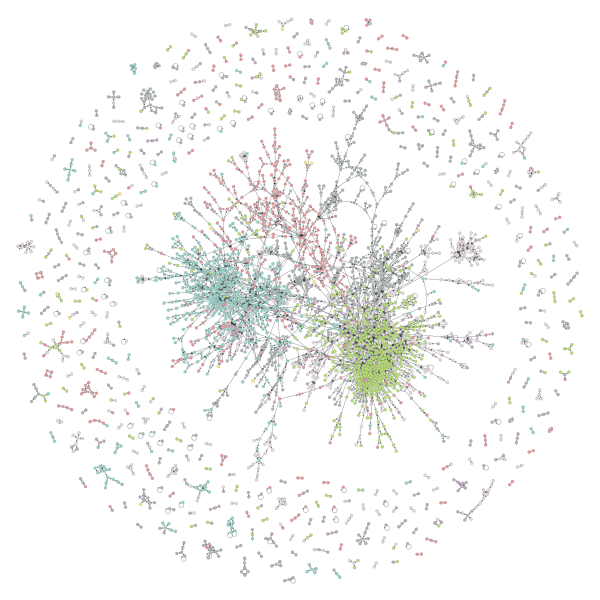

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1180268a20, at 0x7f113a671470>

In [43]:
graph_draw(citeseer_gt, vertex_fill_color=label, output="citeseer_with_labels.pdf")

In [15]:
citeseer_nx = citeseer_pack.get_graph()

In [38]:
label = citeseer_gt.new_vertex_property("int")

In [40]:
classes = np.argmax(citeseer_pack.get_labels(), axis=1)

In [41]:
for i in range(classes.size):
    label[i] = classes[i]

In [44]:
bc_meta = find_meta('blogcatalog')

In [52]:
bc_pack = GraphContainer(bc_meta, dataloc=os.path.abspath('./'))

In [53]:
bc_gt = bc_pack.get_gt_graph()

In [54]:
label = bc_gt.new_vertex_property("int")

In [59]:
classes = np.argmax(bc_pack.get_labels().toarray(), axis=1)

In [60]:
for i in range(classes.size):
    label[i] = classes[i]

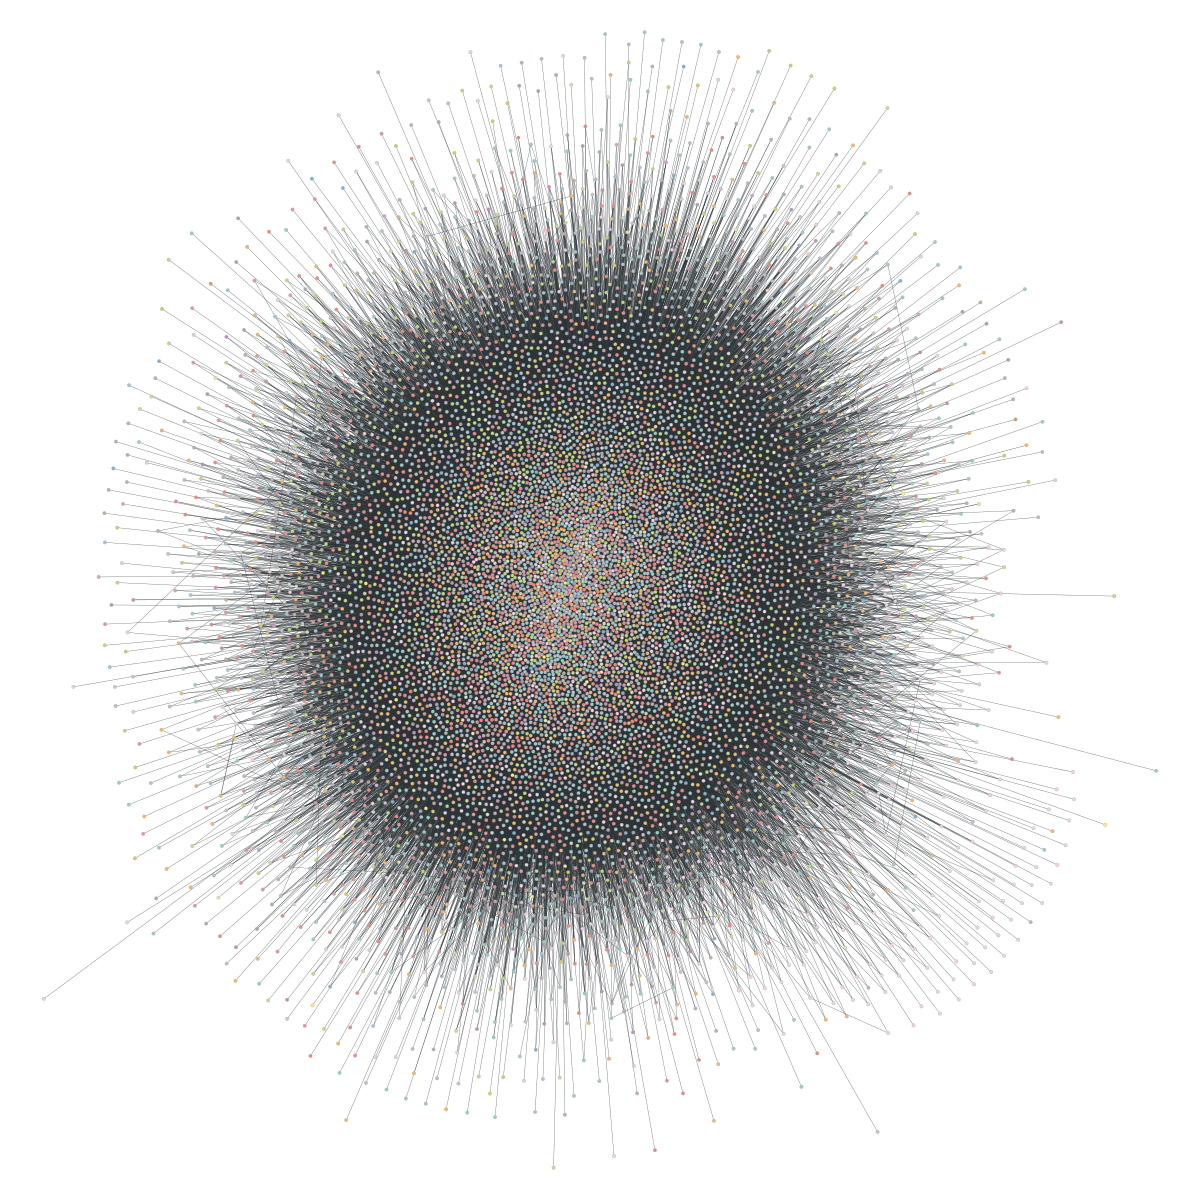

91.13800048828125


In [62]:
from time import time
t = time()
graph_draw(bc_gt, vertex_fill_color=label, output="blogcatalog_with_labels.pdf", output_size=(1200, 1200))
print(time()-t)

In [65]:
cora_meta = find_meta('cora')

In [66]:
cora_pack = GraphContainer(metadata=cora_meta, dataloc=os.path.abspath('./'))

In [67]:
labels = cora_pack.get_labels()

In [69]:
cora_gt = cora_pack.get_gt_graph()

In [70]:
classes = np.argmax(cora_pack.get_labels(), axis=1)

In [71]:
label = cora_gt.new_vertex_property("int")

In [72]:
for i in range(classes.size):
    label[i] = classes[i]

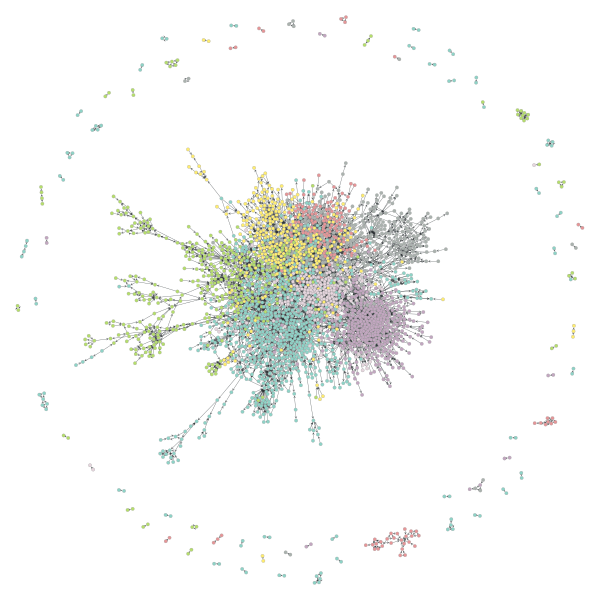

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f1139e06cf8, at 0x7f1139e07c18>

In [73]:
graph_draw(cora_gt, vertex_fill_color=label, output="cora_with_labels.pdf")

Preprocess Amazon co-purchasing data

In [2]:
aloc = "/home/gear/Dropbox/CompletedProjects/motifwalk/data/raw/amazon_copurchasing"

In [3]:
with open(aloc+'/com-amazon.top5000.cmty.txt') as f:
    top5k = f.read()

In [4]:
top5k = top5k.split('\n')

In [5]:
top5klist = [i.split('\t') for i in top5k]

In [6]:
len(max(top5klist, key=len))

328

In [49]:
top5klist[0]

['164985', '225214', '232761']

In [30]:
amazon_nx = nx.read_edgelist('./raw/amazon_copurchasing/com-amazon.ungraph.txt')

In [8]:
amazon_nx.is_directed()

False

In [9]:
amazon_nx.size()

925872

In [10]:
len(amazon_nx.nodes())

334863

In [19]:
sorted_nodes_amazon = sorted(amazon_nx.nodes(), key=int)

In [20]:
map_amazon = {}
for i, node_id in enumerate(sorted_nodes_amazon):
    map_amazon[node_id] = i

In [21]:
len(map_amazon)

334863

In [22]:
max(amazon_nx.nodes(), key=int)

'548551'

In [23]:
map_amazon['548551']

334862

In [36]:
amazon_nx

False

In [37]:
def amazon_type_map(s):
    return map_amazon[s]

In [38]:
amazon_nx = nx.read_edgelist('./raw/amazon_copurchasing/com-amazon.ungraph.txt', nodetype=amazon_type_map)

In [39]:
amazon_nx[0]

{53525: {},
 71631: {},
 98005: {},
 148223: {},
 209319: {},
 268298: {},
 270059: {},
 302147: {}}

In [40]:
max(amazon_nx.nodes())

334862

In [41]:
from scipy.sparse import csr_matrix

In [59]:
label_amazon = np.zeros(shape=(334863, 5000), dtype=np.int8)

In [60]:
for cmty, nodelist in enumerate(top5klist[:-1]):
    for node in nodelist:
        label_amazon[map_amazon[node]][cmty] = 1 

In [63]:
label_amazon = csr_matrix(label_amazon, dtype=np.int8)

In [64]:
label_amazon

<334863x5000 sparse matrix of type '<class 'numpy.int8'>'
	with 67462 stored elements in Compressed Sparse Row format>

In [70]:
label_amazon[4]

(array([], dtype=int32), array([], dtype=int32))

In [71]:
map_amazon['164985']

100150

In [72]:
label_amazon[100150]

<1x5000 sparse matrix of type '<class 'numpy.int8'>'
	with 2 stored elements in Compressed Sparse Row format>

In [73]:
np.nonzero(label_amazon[100150])

(array([0, 0], dtype=int32), array([  0, 820], dtype=int32))

In [74]:
amazon = {}

In [75]:
amazon['Labels'] = label_amazon

In [76]:
amazon['NXGraph'] = amazon_nx

In [77]:
with open('amazon.data', 'wb') as f:
    pickle.dump(amazon, f)